In [2]:
import drawSvg as draw
from opensimplex import OpenSimplex
from itertools import permutations

In [3]:
gen_x = OpenSimplex(seed=123)
gen_y = OpenSimplex(seed=314)

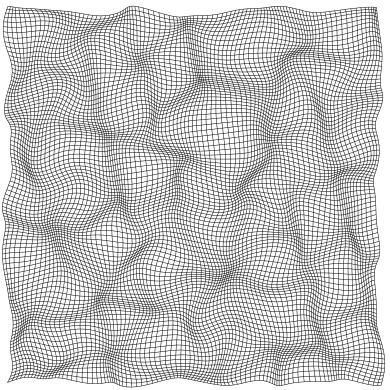

In [4]:
ppw=780
def grid(n, margin_cells=2, noise_space_scale=1, noise_scale=5):
    if type(noise_scale) != type(lambda:None):
        scalar = noise_scale
        noise_scale = lambda x, y: scalar
    scaling = ppw / (n + 2 * margin_cells)
    margin = margin_cells * scaling
    d = draw.Drawing(ppw, ppw, displayInline=False)
    points = []
    for y in range(n):
        row = []
        for x in range(n):
            ypos = margin + y*scaling
            xpos = margin + x*scaling
            noise_x, noise_y = noise_space_scale * x, noise_space_scale * y
            xpos += gen_x.noise2d(noise_x, noise_y) * noise_scale(xpos, ypos)
            ypos += gen_y.noise2d(noise_x, noise_y) * noise_scale(xpos, ypos)
            row.append((ypos, xpos))
        points.append(row)
    
    for y in range(n):
        horizontal = []
        if y % 2:
            for x in range(n):
                py, px = points[y][x]
                horizontal.extend([px, py])
        else:
             for x in reversed(range(n)):
                py, px = points[y][x]
                horizontal.extend([px, py])
        d.append(draw.Lines(*horizontal, stroke='black', fill='none'))
    for x in range(n):
        vertical = []
        if x%2:
            for y in range(n):
                py, px = points[y][x]
                vertical.extend([px, py])
        else:
            for y in reversed(range(n)):
                py, px = points[y][x]
                vertical.extend([px, py])
        d.append(draw.Lines(*vertical, stroke='black', fill='none'))
    d.setPixelScale(.5)
    display(d.rasterize())
grid(100, noise_space_scale = .1, noise_scale=20)

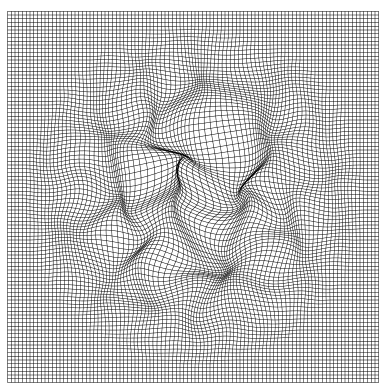

In [5]:
def radial_noise_scale(affected_r = 340, cap=50, scaling=75):
    def inner(x, y):
        x -= ppw//2
        y -= ppw//2
        r = (x**2 + y**2)**.5
        return min(cap, scaling * max((affected_r - r),0) / 500)
    return inner
grid(100, noise_space_scale = .1, noise_scale=radial_noise_scale())

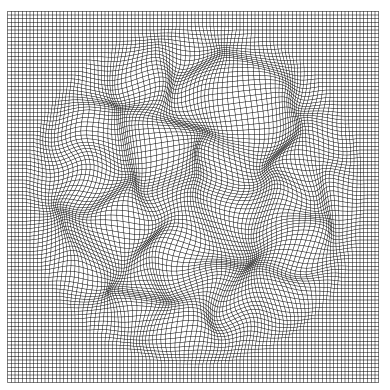

In [6]:

grid(100, noise_space_scale = .09, noise_scale=radial_noise_scale(cap=27, scaling=180))

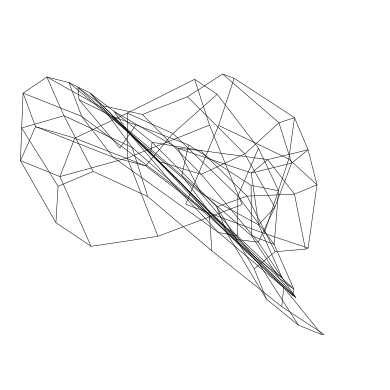

In [7]:
grid(10, margin_cells=100, noise_space_scale = .2, noise_scale=500)